In [1]:
# loading necessary packages
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_root_path = './../../course_images/'

# Finding 1D Template
normxcorr2 function referenced from [Sabrewarrior/normxcorr2-python](!https://github.com/Sabrewarrior/normxcorr2-python/blob/master/normxcorr2.py)

In [2]:
import normxcorr2

s = np.array([-1, 0, 0, 1, 1, 1, 0, -1, -1, 0, 1, 0, 0, -1])
s = np.expand_dims(s, axis=0)
t = np.array([1, 1, 0])
t = np.expand_dims(t, axis=0)

normxcorr2.normxcorr2(t, s, mode='full')

C:\Users\swlee\Desktop\Udacity\udacity-intro-to-computer-vision\notes\2A\normxcorr2.py:50: RuntimeWarning: divide by zero encountered in true_divide
  out = out / np.sqrt(image * template)


array([[ 1.       , -0.5      , -0.5      , -1.       , -0.5      ,
         0.       ,  1.       ,  0.8660254,  0.5      , -1.       ,
        -0.8660254,  0.5      ,  0.5      ,  1.       , -0.5      ,
        -0.5      ]])

It has 1 (maximum normalized correlation coefficient) on index 6. However, it also has 1 in 0th and 13th.

# Finding 2D Template with an image

345 360


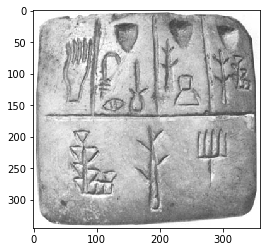

In [3]:
img = cv2.imread(img_root_path + 'tablet.png', cv2.IMREAD_GRAYSCALE)
img_height = img.shape[0]
img_width = img.shape[1]
print(img_height, img_width)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

91 36


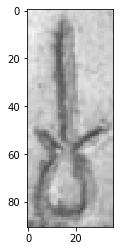

In [4]:
# let's take out portion of the image
template = img[74:165, 149:185]
template_height = template.shape[0]
template_width = template.shape[1]
print(template_height, template_width)
plt.imshow(template, cmap='gray', vmin=0, vmax=255)
plt.show()

min_val = 0.9001677632331848, max_val = 1.0000001192092896, min_loc = (318, 254), max_loc = (149, 74)


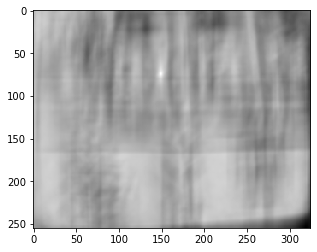

In [5]:
# normalized cross-correlation using opencv
result = cv2.matchTemplate(img, template, method=cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print(f"min_val = {min_val}, max_val = {max_val}, min_loc = {min_loc}, max_loc = {max_loc}")
plt.imshow(result, cmap='gray')
plt.show()

The max location of the correlation result tells me 74 and 149 (the y,x value where the template starts). Also, the result image has a bright spot at that location.